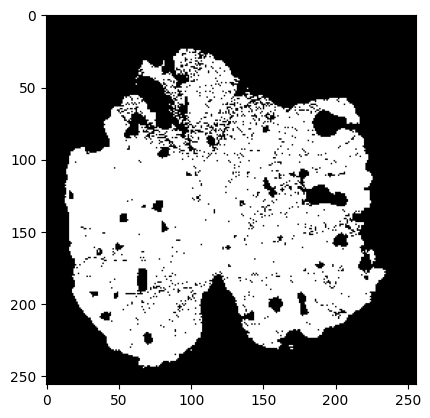

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
image = cv2.imread("anggur.png", 0)
binr = cv2.threshold(image, 0, 128, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
plt.imshow(binr, cmap="gray")


In [14]:
kernel = np.ones((3, 3), np.uint8)
def manual_dilation(image, kernel):
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    dilated_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            if image[i, j] > 0:
                for k in range(kernel_height):
                    for l in range(kernel_width):
                        x = i + k - kernel_height // 2
                        y = j + l - kernel_width // 2
                        
                        if x >= 0 and x < height and y >= 0 and y < width:
                            dilated_image[x, y] = 255
    
    return dilated_image

In [15]:
def manual_erosi(image, kernel):
    threshold = 0.5 
    binary_image = np.where(image > threshold, 1, 0)

    image_height, image_width = binary_image.shape
    kernel_height, kernel_width = kernel.shape

    padding_height = kernel_height // 2
    padding_width = kernel_width // 2

    padded_image = np.pad(binary_image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')

    eroded_image = np.zeros_like(binary_image)

    for i in range(image_height):
        for j in range(image_width):
            eroded_image[i, j] = np.min(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return eroded_image


Text(0.5, 1.0, 'opening')

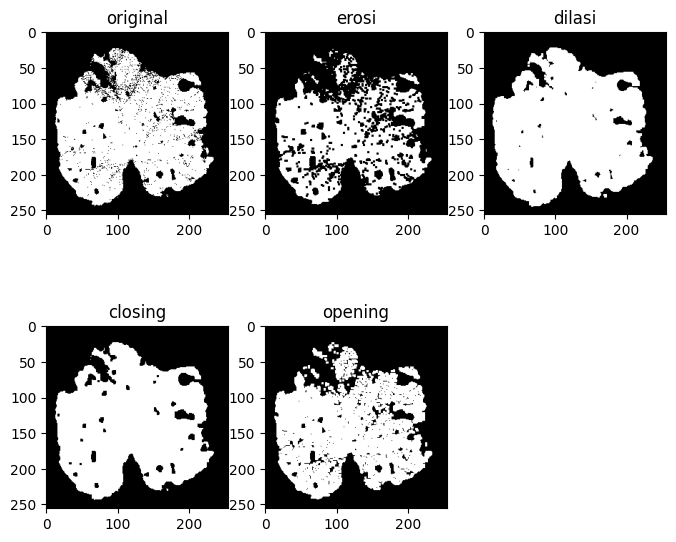

In [19]:
erosi = manual_erosi(binr, kernel)
dilasi = manual_dilation(binr, kernel)

closing = manual_dilation(binr, kernel)
closing = manual_erosi(closing, kernel)

opening = manual_erosi(binr, kernel)
opening = manual_dilation(opening, kernel)

fig = plt.figure(figsize=(8,7))

fig.add_subplot(2, 3, 1)
plt.imshow(binr, cmap='gray')
plt.title("original")

fig.add_subplot(2, 3, 2)
plt.imshow(erosi, cmap="gray")
plt.title("erosi")

fig.add_subplot(2, 3, 3)
plt.imshow(dilasi, cmap="gray")
plt.title("dilasi")

fig.add_subplot(2, 3, 4)
plt.imshow(closing, cmap="gray")
plt.title("closing")

fig.add_subplot(2, 3, 5)
plt.imshow(opening, cmap="gray")
plt.title("opening")